In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

# Plot data-points with matplotlib

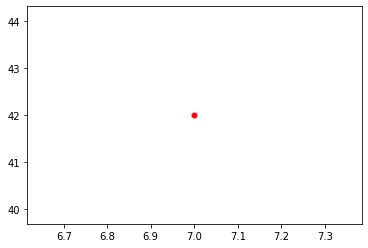

In [3]:
# Plot single point
# 1st, create a figure
fig = plt.figure()
# then create an 'ax' in this figure
ax = fig.add_subplot(111)
# plot red point at x=7, y=42
ax.plot(
    [7],
    [42],
    marker="o",
    markersize=5,
    markeredgecolor="red",
    markerfacecolor="red"
)

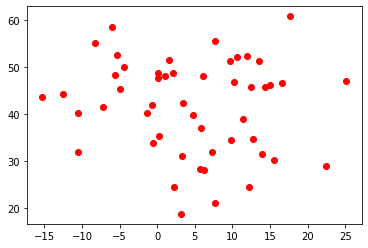

In [4]:
# Plot multiple points
# create a center
center = (7, 42)
# sample scaled normal distribution
datapoints = 10 * np.random.randn(50, 50)
# re-center data
datapoints[0, :] += center[0]
datapoints[1, :] += center[1]
# plot red point for every data-point
plt.scatter(
    datapoints[0, :],
    datapoints[1, :],
    c="red"
)

Text(0.5, 1.0, 'Useless Point Clouds')

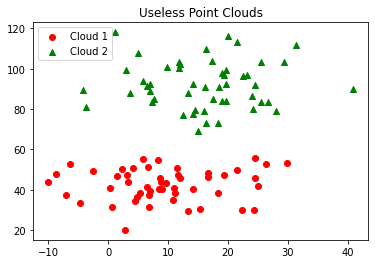

In [5]:
# Use colors, legend and title

# Data-cloud1
# -----------
# create a center
center1 = (7, 42)
# sample scaled normal distribution
datacloud1 = 10 * np.random.randn(50, 50)
# re-center data
datacloud1[0, :] += center1[0]
datacloud1[1, :] += center1[1]

# Data-cloud2
# -----------
# create a center
center2 = (18, 92)
# sample scaled normal distribution
datacloud2 = 10 * np.random.randn(50, 50)
# re-center data
datacloud2[0, :] += center2[0]
datacloud2[1, :] += center2[1]

# plot data cloud1 with red points
plt.scatter(
    datacloud1[0, :],
    datacloud1[1, :],
    c="red"
)
# plot data cloud2 with green triangles
plt.scatter(
    datacloud2[0, :],
    datacloud2[1, :],
    c="green",
    marker="^"
)
# data cloud1 is called "red data cloud"
# data cloud2 is called "green data cloud"
plt.legend(["Cloud 1", "Cloud 2"])
# title of the plot should be "useless point clouds"
plt.title("Useless Point Clouds")

# Plot curves with matplotlib

Text(0.5, 1.0, 'Useless Curves')

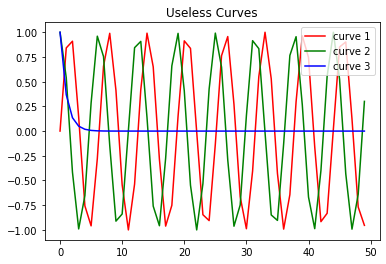

In [6]:
# Some functions
curve1 = np.sin(np.arange(50))
curve2 = np.cos(np.arange(50))
curve3 = np.exp(-np.arange(50))
# plot functions
# colors, labels, title, legends...
plt.plot(curve1, "red")
plt.plot(curve2, "green")
plt.plot(curve3, "blue")

plt.legend(["curve 1", "curve 2", "curve 3"])
plt.title("Useless Curves")

## Let's use some real data

In [ ]:
from sklearn import datasets
boston = datasets.load_boston()
# check the following attributes of boston:
# - boston.target (prices)
# - boston.feature_names (name of descriptor's components)
# - boston.data (values of each feature for each house in the dataset)

# Plot a curve price = f(feature) for every feature in the dataset
# titles and named axes plz
# You might need np.argsort at some point...

In [8]:
df_features = pd.DataFrame(boston.data, columns=boston.feature_names)
target_df = pd.DataFrame(boston.target, columns=["price"])
df = pd.concat([df_features, target_df], axis=1)
df.head(5)

CRIM    ZN  INDUS  CHAS    NOX  ...    TAX  PTRATIO       B  LSTAT  price
0  0.00632  18.0   2.31   0.0  0.538  ...  296.0     15.3  396.90   4.98   24.0
1  0.02731   0.0   7.07   0.0  0.469  ...  242.0     17.8  396.90   9.14   21.6
2  0.02729   0.0   7.07   0.0  0.469  ...  242.0     17.8  392.83   4.03   34.7
3  0.03237   0.0   2.18   0.0  0.458  ...  222.0     18.7  394.63   2.94   33.4
4  0.06905   0.0   2.18   0.0  0.458  ...  222.0     18.7  396.90   5.33   36.2

[5 rows x 14 columns]

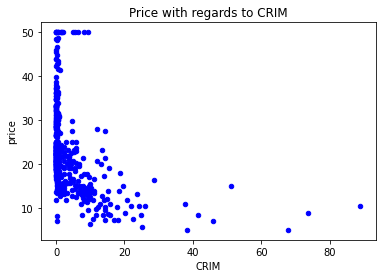

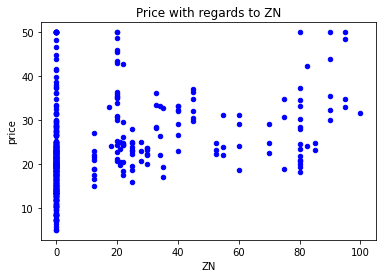

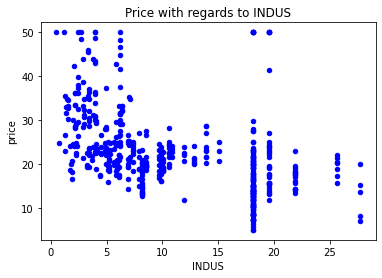

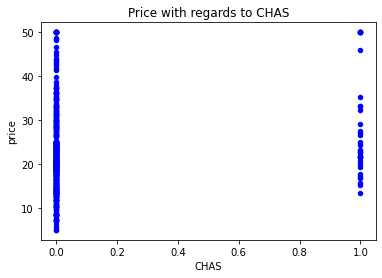

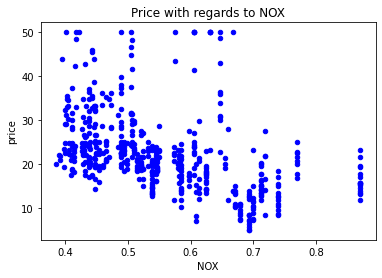

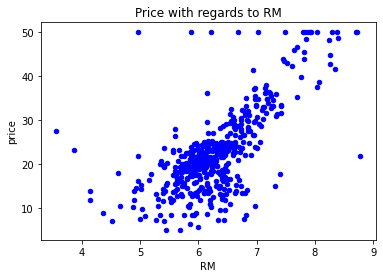

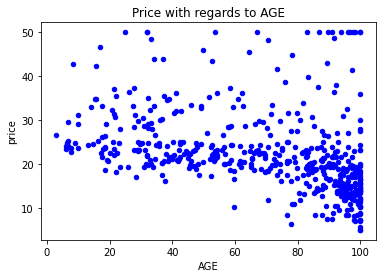

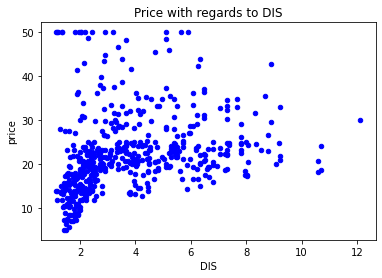

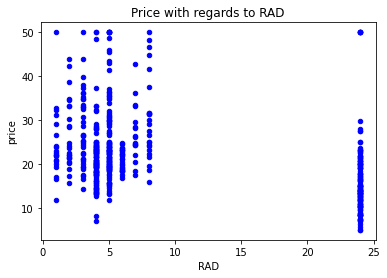

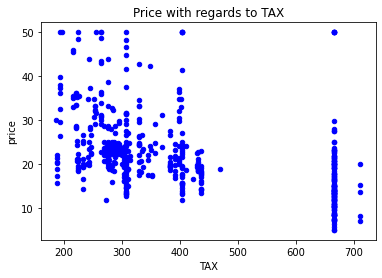

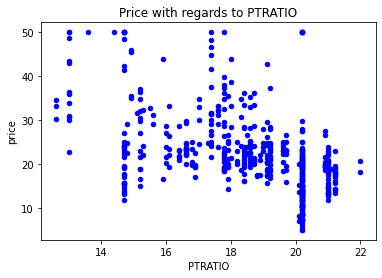

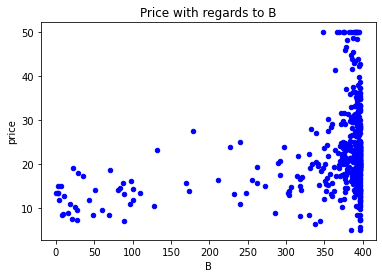

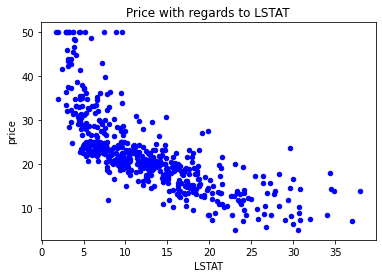

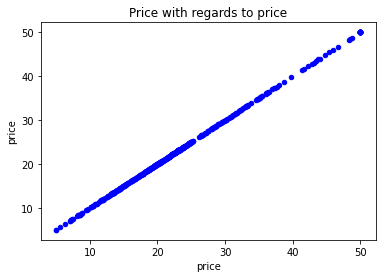

In [9]:
for i in df.columns:
  df.plot(
      kind='scatter',
      x=i,
      y='price',
      color='blue'
  )
  plt.title(f"Price with regards to {i}")

# Read data from files with pandas and plot with seaborn

In [10]:
import seaborn as sns

### Machine learning, experiment monitoring

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [15]:
# read csv file with pandas
# csv file: euclidean_training.csv
data = pd.read_csv("/content/drive/MyDrive/big data/tp_2/euclidean_training.csv")
# print the resulting dataframe
data.head(5)

Unnamed: 0  accuracies  epochs  distance parameter  experiment
0           0    0.696591       0  0.042117     k=0,5           0
1           1    0.851136       1  0.044463     k=0,5           0
2           2    0.896591       2  0.046504     k=0,5           0
3           3    0.912500       3  0.047552     k=0,5           0
4           4    0.922727       4  0.048296     k=0,5           0

Text(0.5, 1.0, 'Distance as a Function of Epochs')

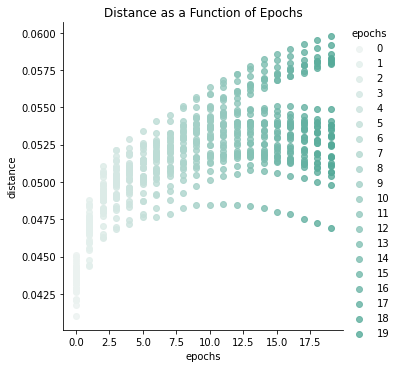

In [16]:
sns.lmplot(
    x="epochs",
    y="distance",
    data=data,
    hue="epochs",
    palette="light:#5A9"
)
plt.title("Distance as a Function of Epochs")

# Plot geographical data

In [19]:
import os, ssl
import smopy
from matplotlib import pyplot as plt
import numpy as np
import json

# The following might be unnecessary (or even produce an error...)
# comment if necessary
if (not os.environ.get('PYTHONHTTPSVERIFY', '') and
getattr(ssl, '_create_unverified_context', None)):
    ssl._create_default_https_context = ssl._create_unverified_context

In [20]:
# Here is a convenient object to create maps (geographical).
class Map(object):
    def __init__(self, latmin, latmax, longmin, longmax, zoom):
        self.latmin = latmin
        self.latmax = latmax
        self.longmin = longmin
        self.longmax = longmax
        self.zoom = zoom
        self.smopymap = smopy.Map((latmin, latmax, longmin, longmax), z=zoom)
    
    def get_image(self):
        return np.array(self.smopymap.img)
    
    def to_image_pixels(self, lat, long):
        return [int(k) for k in self.smopymap.to_pixels(lat, long)]

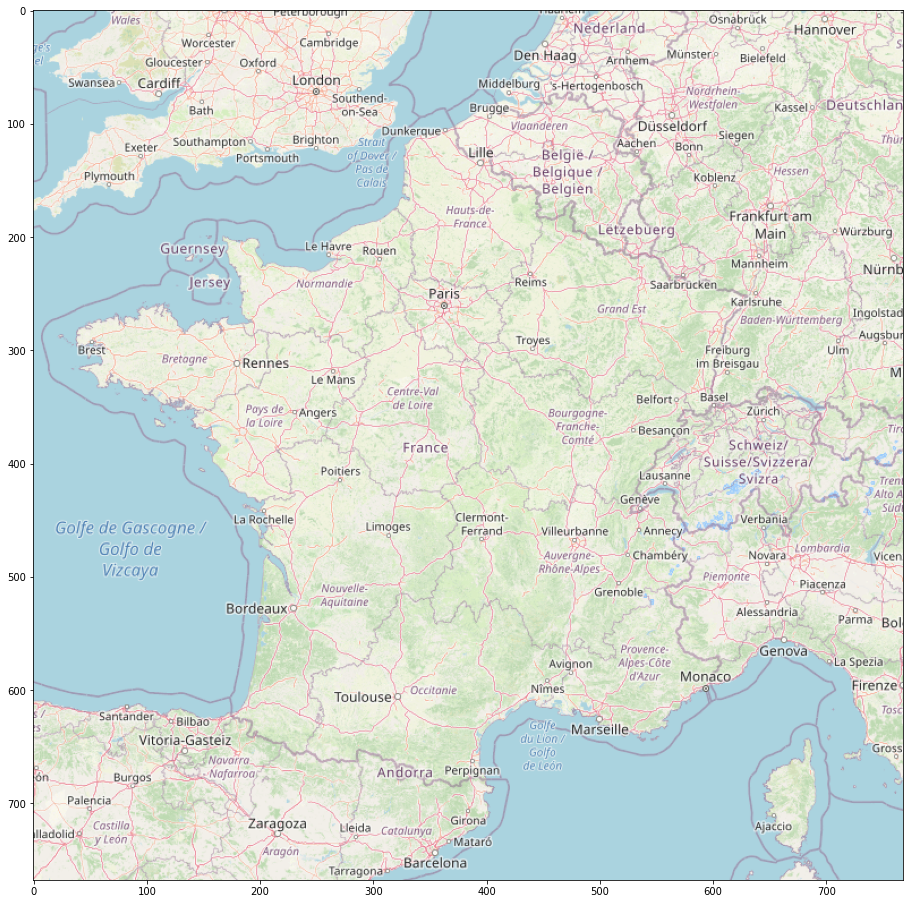

In [21]:
# plot an image with matplotlib
my_map = Map(45., -1., 48.9, 5.5, 6)
image = my_map.get_image()
# create figure
fig = plt.figure(figsize=(16, 16))
# create an 'ax' on the figure
ax = fig.add_subplot(111)
# show image on the ax
plt.imshow(image)

(768, 768, 3)
362 260


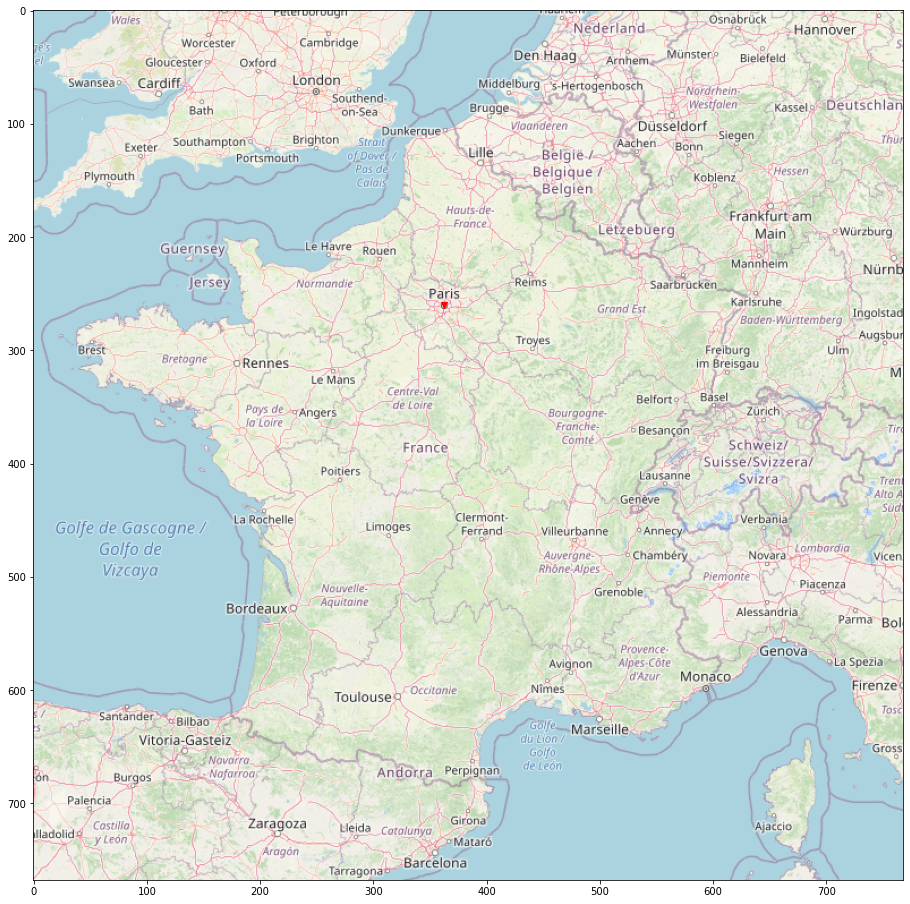

In [22]:
# show image structure
print(image.shape)
# change color of a pixel in the image
Paris_latitude = 48.86151
Paris_longitude = 2.33474
x, y = my_map.to_image_pixels(Paris_latitude, Paris_longitude)
print(x, y)
fig = plt.figure(figsize=(16, 16))
# create an 'ax' on the figure
ax = fig.add_subplot(111)
# show image on the ax with a red circle placed on Paris
plt.imshow(image)
plt.plot(x, y, marker='v', color="red")

# French Universities

In [23]:
# load a json file
# file is: fr-esr-principaux-etablissements-enseignement-superieur.json
with open("/content/drive/MyDrive/big data/tp_2/fr-esr-principaux-etablissements-enseignement-superieur.json", "r") as f:
    data = json.load(f)

In [24]:
# get coordinates of each school
coord = []
try:
  for i in range(len(data)):
    latlong = data[i].get("geometry").get("coordinates")
    coord.append(latlong)
except AttributeError:
  pass

In [25]:
df_coord = pd.DataFrame(coord, columns=["lat", "long"])
df_coord.head(5)

lat       long
0  7.000275  43.585540
1  4.078808  48.283768
2  5.447070  43.531200
3  5.993990  47.251000
4  4.356710  43.842900

In [69]:
df_map = []

for i in range(len(df_coord)):
  coord_to_map = my_map.to_image_pixels(
      df_coord["long"][i],
      df_coord["lat"][i]
  )

  df_map.append(coord_to_map)

df_map = pd.DataFrame(df_map).rename(columns={0: "long", 1: "lat"})
df_map.head(5)

long  lat
0   574  607
1   441  299
2   503  611
3   528  369
4   454  591

In [ ]:
# Drop outlier (school in La Reunion) and fix index
df_map = df_map.drop(59)
df_map["new_index"] = range(len(df_map))
df_map = df_map.set_index("new_index")

(768, 768, 3)


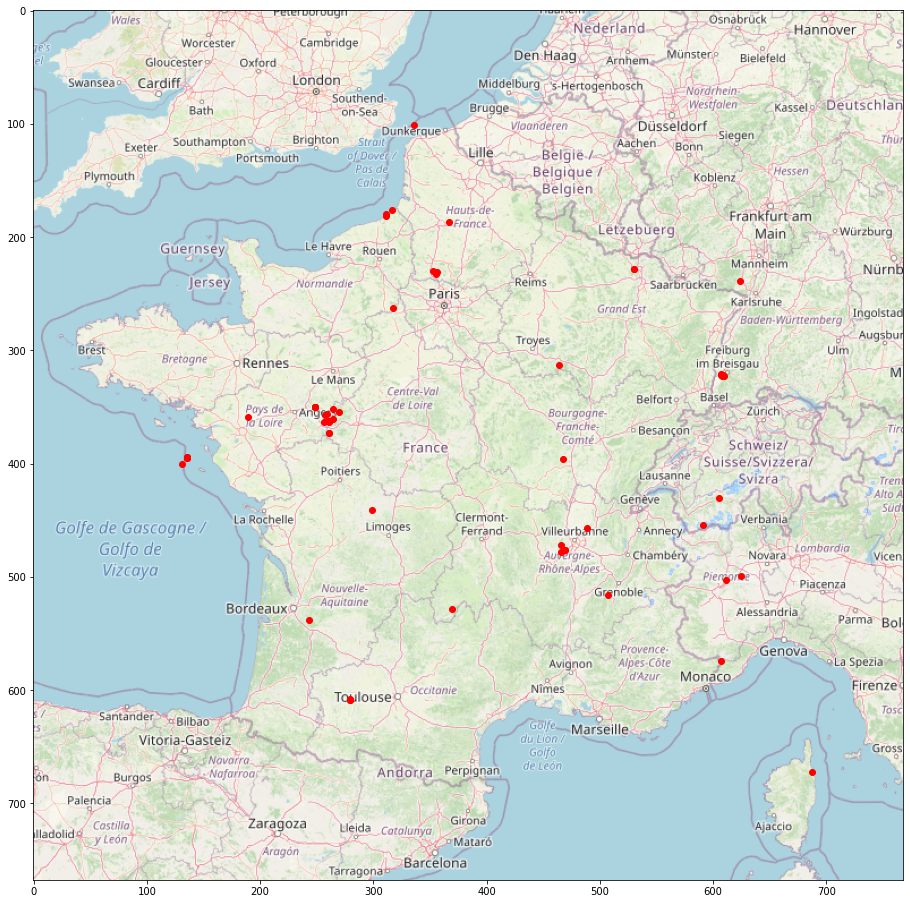

In [73]:
print(image.shape)

fig = plt.figure(figsize=(16, 16))
ax = fig.add_subplot(111)

plt.imshow(image)

plt.scatter(
  df_map["lat"],
  df_map["long"],
  color="red"
)

# Charts

### Statistics on a user base

In [74]:
# Load csv: users.csv
# plot a pie chart of nationality of the users
user_data = pd.read_csv("/content/drive/MyDrive/big data/tp_2/users.csv")
user_data.head(5)

user_id first_name last_name  gender  birth_date        country
0        1    Janifer    Lagadu  Female  1940-08-09  United States
1        2      Bruis   Danilov    Male  1966-05-28         Brazil
2        3       Omar  Spinozzi    Male  1977-08-28          China
3        4        Mag   Kennedy  Female  1963-11-11          China
4        5     Gerome    Lushey    Male  1990-06-08         Brazil

In [80]:
by_country = user_data.groupby(["country"]).sum()
by_country.head(5)

user_id
country         
Brazil       984
China       2776
France       611
Germany       91
Japan        171

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  after removing the cwd from sys.path.


Text(0.5, 1.0, 'Nationality Distribution')

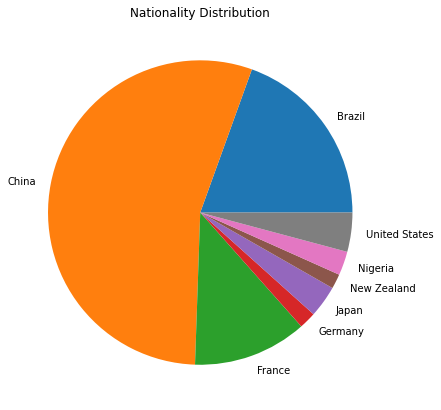

In [82]:
fig = plt.figure(figsize=(10, 7))
plt.pie(
    by_country,
    labels=total.index
)
plt.title("Nationality Distribution")

### Comparing distributions

In [83]:
# Load uncertainty.csv
# create violin plots with seaborn
# 'erroneous' next to 'correct' densities
uncert_data = pd.read_csv("/content/drive/MyDrive/big data/tp_2/uncertainty.csv")
uncert_data.head(5)

prediction  uncertainty
0    correct     0.208022
1    correct     0.036605
2    correct     0.067507
3    correct     0.035876
4    correct     0.043756

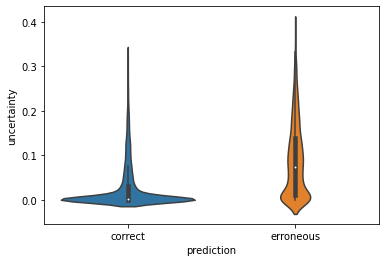

In [85]:
sns.violinplot(
    data=uncert_data,
    x="prediction",
    y="uncertainty"
)